In [1]:
from statistics import mean, stdev, median
from matplotlib import pyplot as plt
import numpy as np
import torch

<BarContainer object of 158 artists>

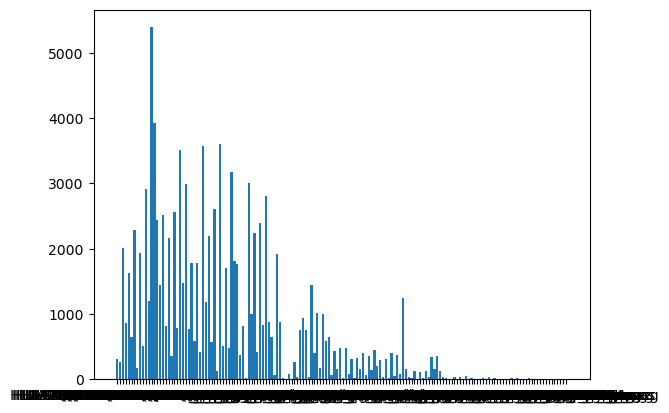

In [2]:

f = '/projects/0/einf2380/data/external/processed/II/IDs_BA_MHCII.csv'
rows=[]
with open(f) as infile: 
    next(infile) 
    for line in infile: 
        row = line.replace('\n','').split(',') 
        rows.append(row) 


d = {}
for row in rows:
    d[row[2]] = {'pos':0,'neg':0}

for row in rows:
    label = ['neg','pos'][float(row[4])<=500.]
    d[row[2]][label] += 1 

for key in d:
    tot = d[key]['pos']+d[key]['neg']
    pos = (d[key]['pos']/tot) *100
    neg = (d[key]['neg']/tot) *100

to_plot = []
labels = []
for key in d:
    to_plot.append(d[key]['pos'])
    labels.append(f'{key}_pos')
    to_plot.append(d[key]['neg'])
    labels.append(f'{key}_neg')
plt.bar(labels,to_plot)

(array([19242., 13016., 13259., 14471., 13154., 11941.,  9758.,  6500.,
         4514.,  2980.]),
 array([ 0.       ,  1.0819778,  2.1639557,  3.2459335,  4.3279114,
         5.409889 ,  6.491867 ,  7.573845 ,  8.655823 ,  9.737801 ,
        10.819778 ], dtype=float32),
 <BarContainer object of 10 artists>)

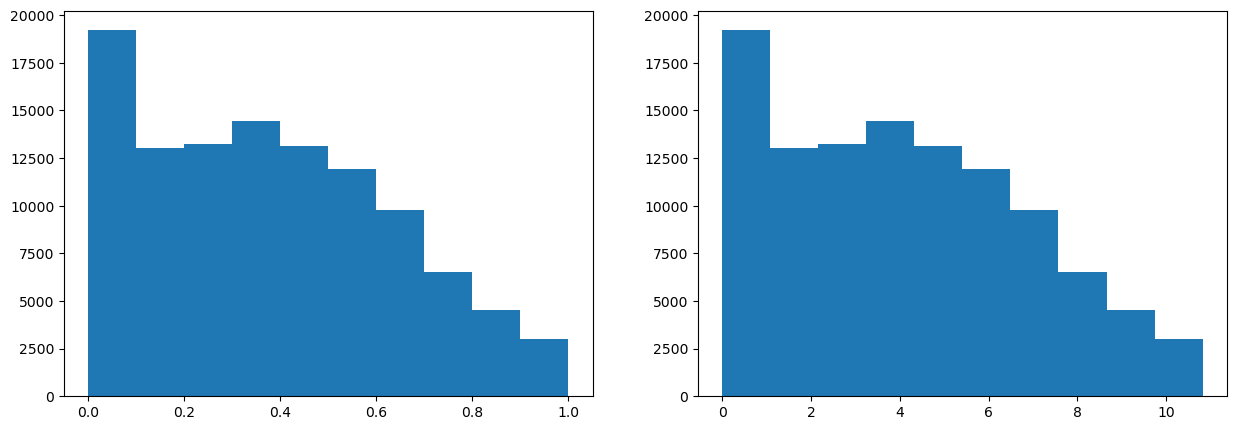

In [42]:
all_values = []
for row in rows:
    all_values.append(float(row[4]))
df = torch.tensor(all_values)
#all_values = torch.tensor(all_values)

def normalize(df):
    return torch.log(df)

def netmhc_normalize(df):
    return (torch.div(torch.log(df),np.log(50000)))

# all_values = normalize(all_values)
# all_values = (torch.div(torch.log(torch.tensor(df)),stdev(df)))
# 1-log(aff)/log(50,000)
fig = plt.figure(figsize=(15,5))
(ax1, ax2) = fig.subplots(1, 2)

ax1.hist(netmhc_normalize(df))
ax2.hist(normalize(df))

In [57]:
pool = torch.sort(netmhc_normalize(df))
pool = pool.values

for interval in range(10):
    bin = pool[interval*10:(interval+1)*10]
    print(bin)
    #plt.hist(bin)
    #plt.show()
    #plt.clf()


(tensor([0., 0., 0.,  ..., 1., 1., 1.]), tensor([ 39590,  98495,  39615,  ...,  24025, 105089,  75836]))
()
()
()
()
()
()
()
()
()


In [8]:
print('Unique peptides:', len(set(row[1] for row in rows)))
print('Unique alleles: ', len(set(row[2] for row in rows)))
print('Unique peptide-allele combinations: ', len(set((row[1], row[2]) for row in rows)))

print('Unique human peptides:', len(set(row[1] for row in rows if 'HLA' in row[2])))
print('Unique human alleles: ', len(set(row[2] for row in rows if 'HLA' in row[2])))
print('Unique human peptide-allele combinations: ', len(set((row[1], row[2]) for row in rows if 'HLA' in row[2])))

Unique peptides: 13667
Unique alleles:  79
Unique peptide-allele combinations:  108362
Unique human peptides: 12858
Unique human alleles:  71
Unique human peptide-allele combinations:  106426


In [16]:
ids = []
occurencies = {(x[1], x[2]) : 0 for x in rows}
for row in rows:
    occurencies[(row[1], row[2])] += 1

doubles = [key for key in occurencies if occurencies[key] >1]
values = {double : [] for double in doubles}
for double in doubles:
    #print(mean([float(x[4]) for x in rows if (x[1], x[2]) == double]))
    [values[double].append(float(x[4])) for x in rows if (x[1], x[2]) == double]

print(len([x for x in values if 'HLA' in x[1]]))

3


In [18]:
[values[x] for x in values if 'HLA' in x[1]]

[[633.8773177271232, 821.2671590035218],
 [1211.3550636761095, 655.2933314497534],
 [13400.162154874684, 1.0]]